In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
customers=pd.read_csv('customer_behavior_analytcis.csv')


In [9]:
customers

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [5]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB
None


In [6]:
print(customers.describe())

       total_purchases  avg_cart_value  total_time_spent  product_click  \
count       979.000000      979.000000        999.000000     979.000000   
mean         11.570991       75.457978         49.348759      28.237998   
std           7.016327       55.067835         32.730973      16.296384   
min           0.000000       10.260000          5.120000       4.000000   
25%           6.000000       33.130000         22.375000      16.000000   
50%          10.000000       49.380000         40.360000      21.000000   
75%          17.000000      121.255000         77.170000      45.000000   
max          32.000000      199.770000        119.820000      73.000000   

       discount_counts  
count       999.000000  
mean          4.313313  
std           4.532772  
min           0.000000  
25%           1.000000  
50%           2.000000  
75%           8.000000  
max          21.000000  


Handling misisng values

In [7]:
print(customers.isnull().sum()) 


total_purchases     20
avg_cart_value      20
total_time_spent     0
product_click       20
discount_counts      0
customer_id          0
dtype: int64


In [16]:
# Fill the missing values:
# total_purchases   : mean
# avg_cart_value      : mean
# product_click       : mean

null_rows = customers[customers["total_purchases"].isnull()]
print(null_rows[["total_purchases", "avg_cart_value", "product_click"]])


Empty DataFrame
Columns: [total_purchases, avg_cart_value, product_click]
Index: []


In [39]:
customers = customers.dropna(subset=["total_purchases", "avg_cart_value", "product_click"])

In [40]:
customers = customers.drop(columns=["customer_id"])

Handling Duplicates

In [41]:
duplicate_rows = customers[customers.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [43]:
duplicate_customers = customers[customers.duplicated(subset=["customer_id"])]
duplicate_customers

KeyError: Index(['customer_id'], dtype='object')

Database Visualization

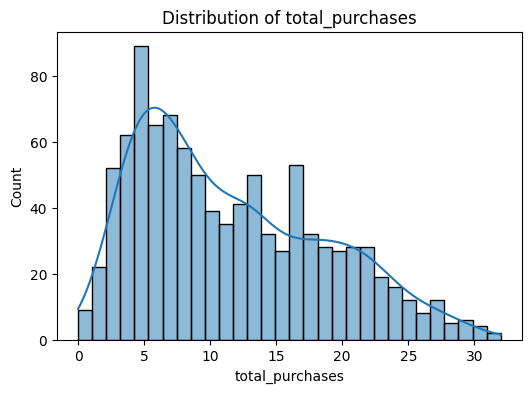

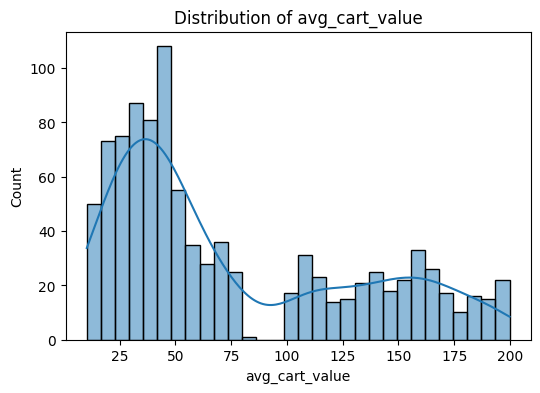

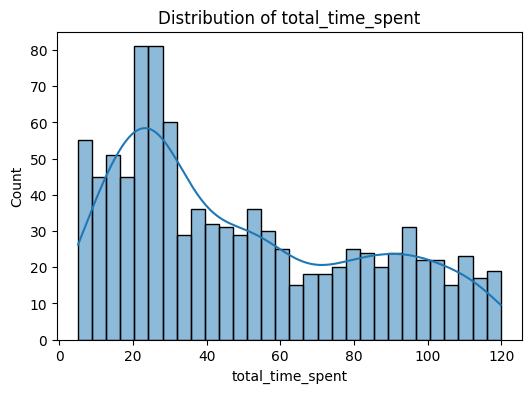

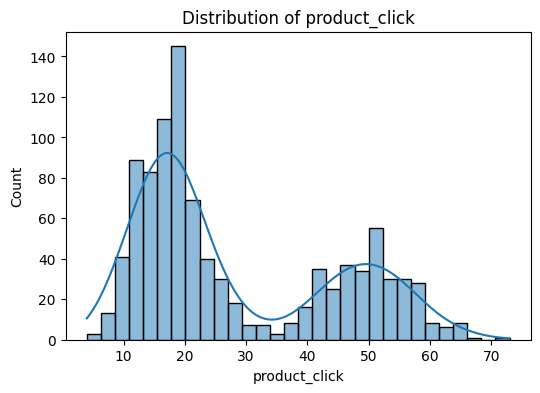

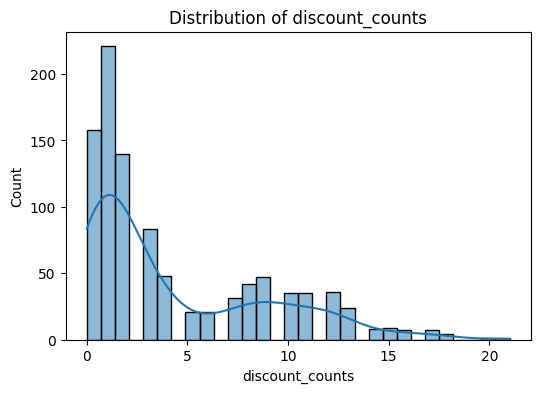

In [44]:
features = ["total_purchases", "avg_cart_value", "total_time_spent", "product_click", "discount_counts"]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(customers[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.show()

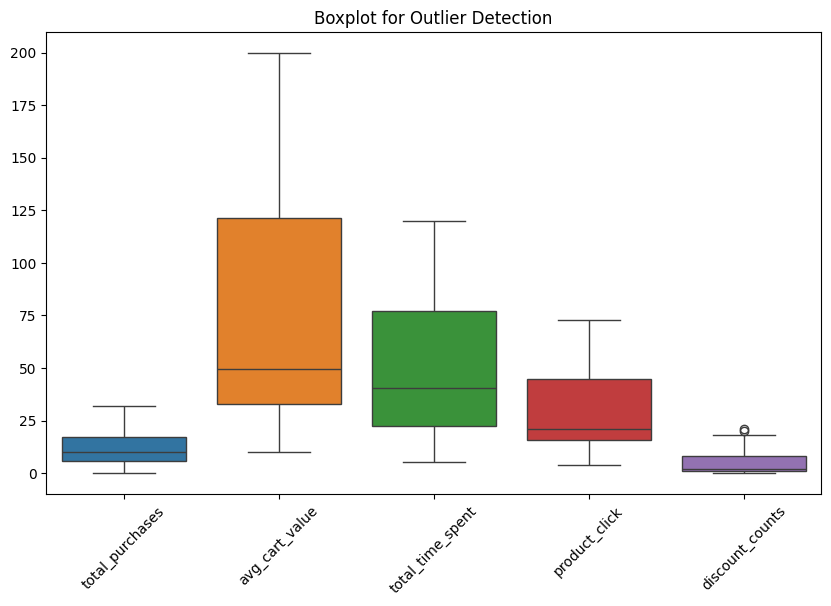

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=customers[features])
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


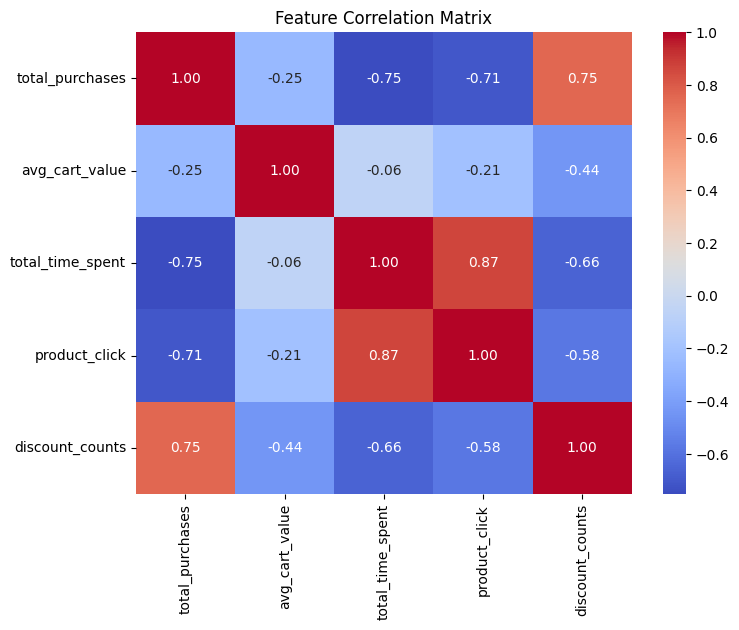

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(customers.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [47]:
customers = customers.drop(columns=["product_click"])

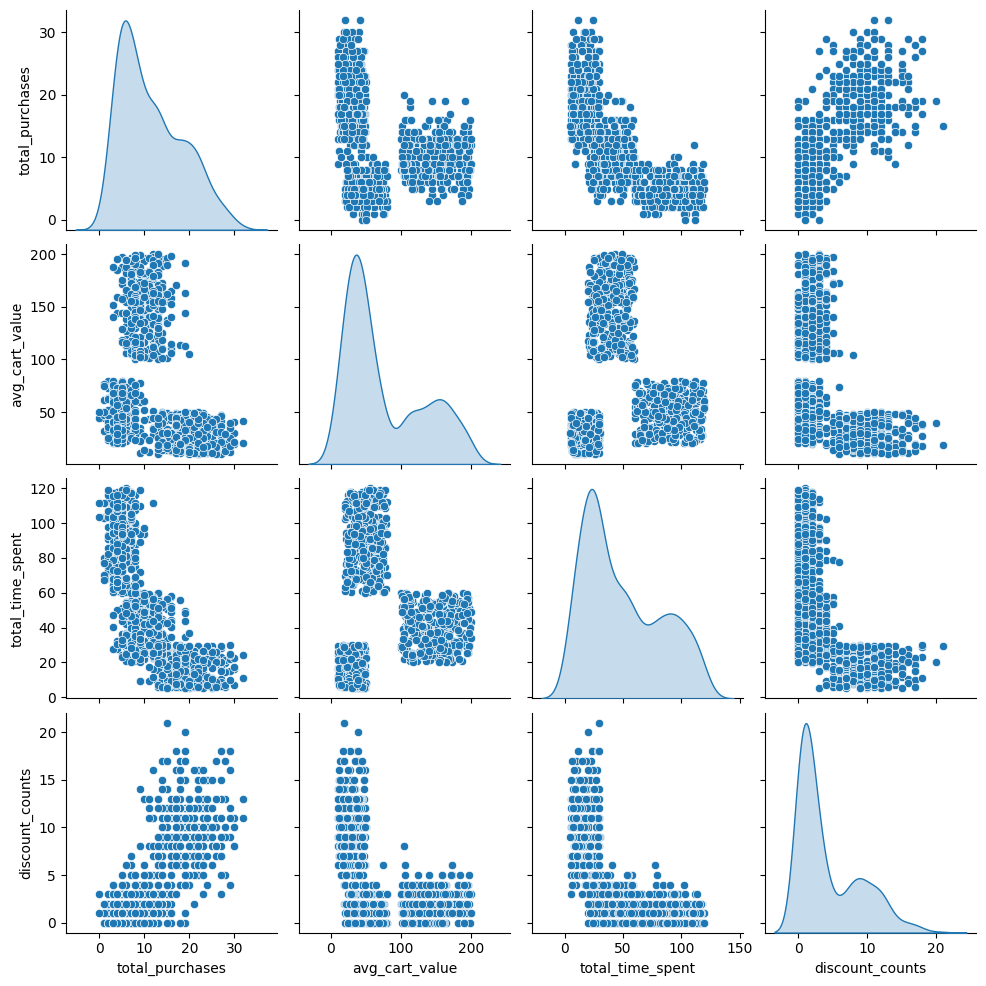

In [48]:
sns.pairplot(customers, diag_kind="kde")
plt.show()

Scale the data

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customers)

In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

optimal_k = 3  # Assuming 3 is the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to your data
customers['cluster'] = kmeans.labels_


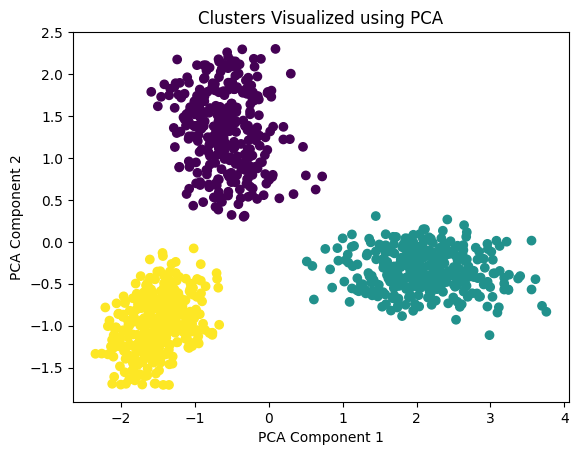

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customers['cluster'], cmap='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [54]:
cluster_centers = kmeans.cluster_centers_

# Convert the cluster centers to a DataFrame for easier interpretation
cluster_centers_df = pd.DataFrame(cluster_centers, columns=customers.columns[:-1])  # Exclude the 'cluster' column
print(cluster_centers_df)

   total_purchases  avg_cart_value  total_time_spent  discount_counts
0        -0.199010        1.305770         -0.277476        -0.518013
1         1.160839       -0.818654         -0.974183         1.247639
2        -0.956571       -0.480165          1.243180        -0.726757


0 : High Spenders
1 : Bargain Hunters
2 : Window Shoppers

In [55]:
cluster_labels = {
    0: "High Spenders",
    1: "Bargain Hunters",
    2: "Window Shoppers"
}

# Map the cluster labels to the `cluster` column
customers['cluster_label'] = customers['cluster'].map(cluster_labels)

# Check the dataset with labels
print(customers[['cluster', 'cluster_label']].head())

   cluster    cluster_label
0        0    High Spenders
1        1  Bargain Hunters
2        2  Window Shoppers
3        1  Bargain Hunters
4        0    High Spenders


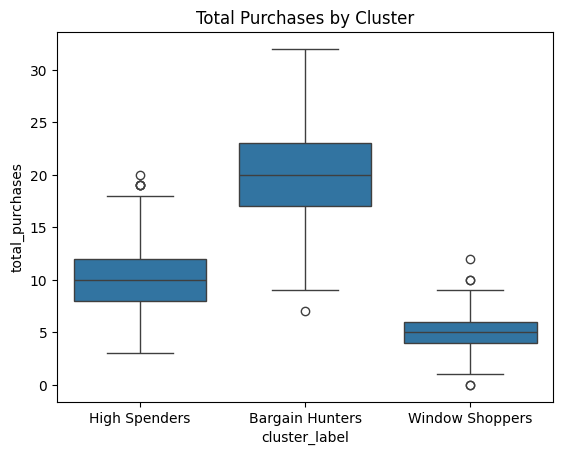

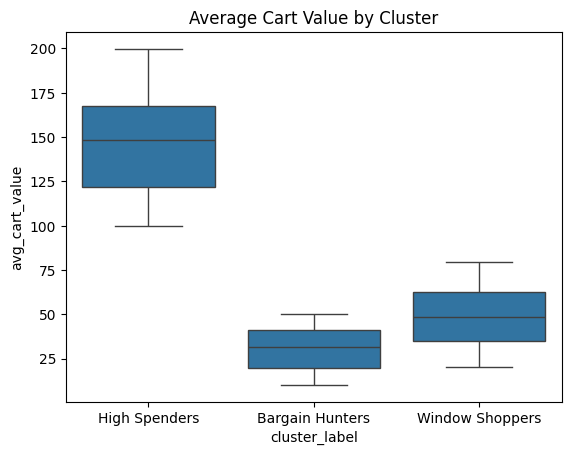

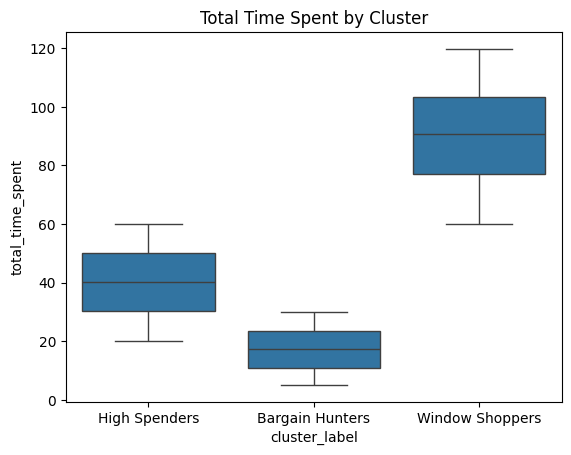

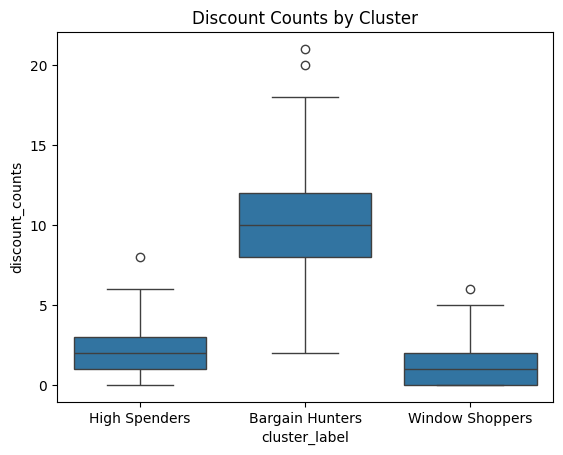

In [57]:
# 'total_purchases' across clusters
sns.boxplot(x='cluster_label', y='total_purchases', data=customers)
plt.title('Total Purchases by Cluster')
plt.show()

# 'avg_cart_value' across clusters
sns.boxplot(x='cluster_label', y='avg_cart_value', data=customers)
plt.title('Average Cart Value by Cluster')
plt.show()

# 'total_time_spent' across clusters
sns.boxplot(x='cluster_label', y='total_time_spent', data=customers)
plt.title('Total Time Spent by Cluster')
plt.show()

# 'discount_counts' across clusters
sns.boxplot(x='cluster_label', y='discount_counts', data=customers)
plt.title('Discount Counts by Cluster')
plt.show()